# Module 7: Digit Recognizer

2023-11-14 14:35:00.944190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [22]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from datetime import datetime

In [3]:
#Import data
train_df = pd.read_csv('digittrain-2.csv')
test_df = pd.read_csv('digittest.csv')


# Further EDA

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train_df.shape

(42000, 785)

In [8]:
test_df.shape

(28000, 784)

In [9]:
#Check for null although shouldnt be any...
columns_with_null = train_df.columns[train_df.isnull().any()]
null_values = train_df[columns_with_null].isnull().sum()

print("Columns with null values:")
print(null_values)

Columns with null values:
Series([], dtype: float64)


/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


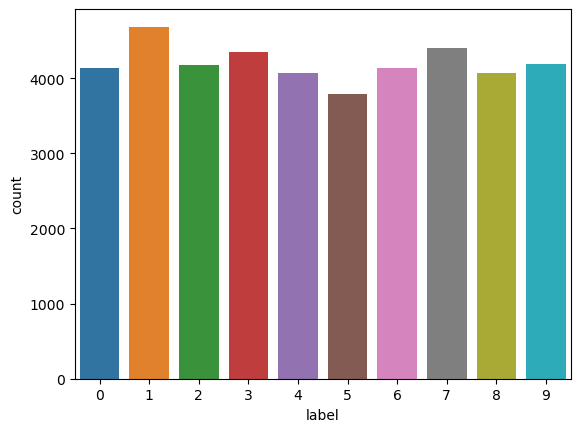

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [10]:
X_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df["label"]

sns.countplot(x = y_train)
plt.show()

print(y_train.value_counts())

Corresponding handwritten digits matched below: [4 0 0 7 3 4 7 1 8 4 7 8 5 8 5 6]


/var/folders/71/kt3th06j0w36j864cy126bwm0000gn/T/ipykernel_4633/2790828296.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_images.drop(columns=['label'], inplace=True)


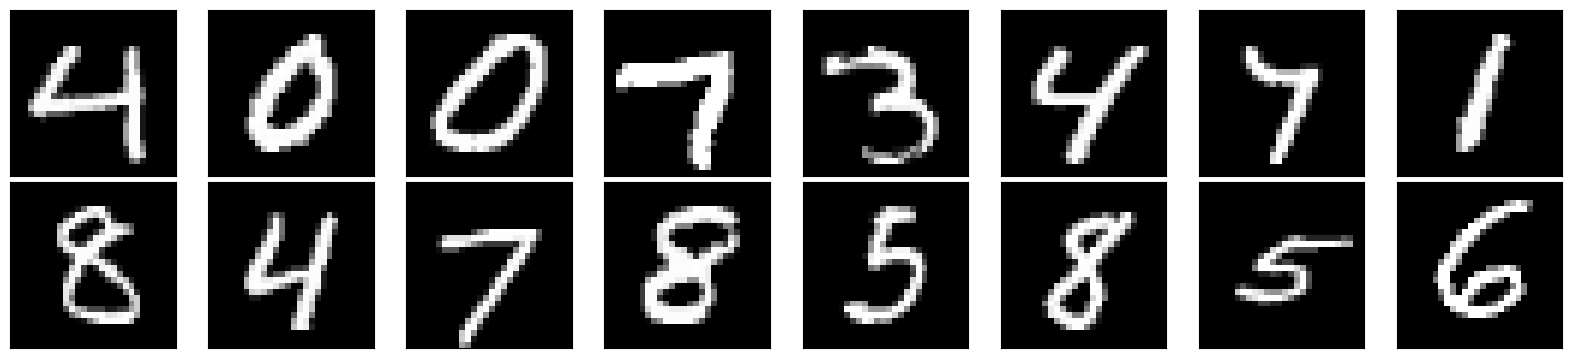

In [51]:
def display_digits(N, df):
    
    N = min(N, df.shape[0])

    # Randomly pick N images
    images = np.random.choice(df.index, size=N, replace=False)
    
    #Extracting subset of images and labels
    subset_images = df.iloc[images]
    labels = subset_images['label'].values
    print(f"Corresponding handwritten digits matched below: {labels}")

    subset_images.drop(columns=['label'], inplace=True)

    plt.figure(figsize=(16, 4))  

    for i, row in enumerate(subset_images.values):
        plt.subplot(2, 8, i+1)  
        pixels = row.reshape((28, 28))  
        plt.imshow(pixels, cmap='gray') 
        plt.xticks([])  
        plt.yticks([])  

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()

display_digits(16, train_df)

# Dataset Formation and Processing

In [12]:
# Reload data 
train = pd.read_csv('digittrain-2.csv')
test = pd.read_csv('digittest.csv')

In [13]:
#Separate Data
X_train = train.drop(labels=["label"], axis=1)
Y_train = train["label"]

X_test = test

In [14]:
# Split into tain and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=428)

In [15]:
# Feature scaling using MinMaxScaler
minmax = MinMaxScaler()

X_train = minmax.fit_transform(X_train)

# Transform validation and test
X_val = minmax.transform(X_val)
X_test = minmax.transform(X_test)

/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/kevhhu/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [52]:
# One-hot encoding
keras_Y = tf.keras.utils.to_categorical(Y_train, 10)
keras_Y_val = tf.keras.utils.to_categorical(Y_val, 10)


# Neural Networks Testing
The 2x2 completely crossed design will examine four combinations:
- 2 layers with 128 nodes
- 2 layers with 256 nodes 
- 4 layers with 128 nodes
- 4 layers with 256 nodes

## Neural Network 1 : 2 layers and 128 nodes

In [23]:
start_time = datetime.now()

# Model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))
end_time = datetime.now()

training_time = end_time - start_time
print(f"Training Time: {training_time}")

# Training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")


Epoch 1/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.2770 - accuracy: 0.9176 - val_loss: 0.1483 - val_accuracy: 0.9550
Epoch 2/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1117 - accuracy: 0.9656 - val_loss: 0.1061 - val_accuracy: 0.9664
Epoch 3/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0769 - accuracy: 0.9754 - val_loss: 0.1031 - val_accuracy: 0.9681
Epoch 4/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0874 - val_accuracy: 0.9714
Epoch 5/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0982 - val_accuracy: 0.9712
Epoch 6/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9879 - val_loss: 0.0936 - val_accuracy: 0.9729
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.1048 - val_accuracy:

In [25]:
model_pred = model.predict(X_test)
predicted_labels = np.argmax(model_pred, axis=1)
predicted_labels = pd.Series(predicted_labels, name="Label")

submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels], axis=1)

submission.to_csv('model1_Pred.csv', index=False)

875/875 [==============================] - 1s 721us/step


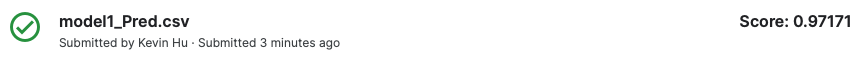

## Neural Network 2: 2 layers and 256 Nodes

In [26]:
start_time = datetime.now()

# Model architecture
model_2 = Sequential()
model_2.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],))) 
model_2.add(Dense(256, activation='relu'))  
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time = datetime.now()
training_time_2 = end_time - start_time
print(f"Training Time: {training_time_2}")

# Training and validation accuracy
train_accuracy_2 = history_2.history['accuracy'][-1]
val_accuracy_2 = history_2.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_2}")
print(f"Validation Accuracy: {val_accuracy_2}")

Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2350 - accuracy: 0.9279 - val_loss: 0.1202 - val_accuracy: 0.9621
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0967 - accuracy: 0.9692 - val_loss: 0.0945 - val_accuracy: 0.9726
Epoch 3/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9676
Epoch 4/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.1248 - val_accuracy: 0.9631
Epoch 5/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0889 - val_accuracy: 0.9752
Epoch 6/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0948 - val_accuracy: 0.9767
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 0.9918 - val_loss: 0.1107 - val_accuracy:

In [27]:
model_2_pred = model_2.predict(X_test)
predicted_labels_2 = np.argmax(model_2_pred, axis=1)
predicted_labels_2 = pd.Series(predicted_labels_2, name="Label")

submission_2 = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_2], axis=1)

submission_2.to_csv('model2_Pred.csv', index=False)

875/875 [==============================] - 1s 682us/step


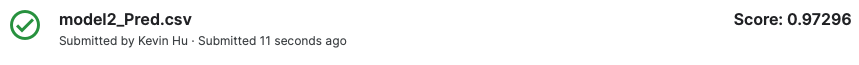

### Testing Neural Network 2 with 30 epochs

In [28]:
start_time_v2 = datetime.now()

model_2_v2 = Sequential()
model_2_v2.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_2_v2.add(Dense(256, activation='relu'))  
model_2_v2.add(Dense(10, activation='softmax'))  

model_2_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#30 epochs
history_2_v2 = model_2_v2.fit(X_train, keras_Y, epochs=30, validation_data=(X_val, keras_Y_val))

end_time_v2 = datetime.now()

training_time_2_v2 = end_time_v2 - start_time_v2
print(f"Training Time (30 epochs): {training_time_2_v2}")

train_accuracy_2_v2 = history_2_v2.history['accuracy'][-1]
val_accuracy_2_v2 = history_2_v2.history['val_accuracy'][-1]
print(f"Training Accuracy (30 epochs): {train_accuracy_2_v2}")
print(f"Validation Accuracy (30 epochs): {val_accuracy_2_v2}")

Epoch 1/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9290 - val_loss: 0.1495 - val_accuracy: 0.9524
Epoch 2/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0963 - accuracy: 0.9694 - val_loss: 0.1027 - val_accuracy: 0.9690
Epoch 3/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0799 - val_accuracy: 0.9729
Epoch 4/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0896 - val_accuracy: 0.9717
Epoch 5/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0373 - accuracy: 0.9874 - val_loss: 0.0814 - val_accuracy: 0.9748
Epoch 6/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.1056 - val_accuracy: 0.9705
Epoch 7/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0995 - val_accuracy:

Looking at the differences between 10 epochs and 30 epochs, there was no change in scoring of the validation accuracy between the two. However, when increasing the epochs there is potential for overfitting to the training data. This appears to be the case since there is no change in validation accuracy but an increase in training accuracy. 

## Neural Network 3: 4 layers and 256 Nodes

In [30]:
start_time_3 = datetime.now()

# Model architecture for third 
model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) 
model_3.add(Dense(128, activation='relu'))  
model_3.add(Dense(128, activation='relu')) 
model_3.add(Dense(128, activation='relu'))  
model_3.add(Dense(10, activation='softmax'))  

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time_3 = datetime.now()

training_time_3 = end_time_3 - start_time_3
print(f"Training Time: {training_time_3}")

train_accuracy_3 = history_3.history['accuracy'][-1]
val_accuracy_3 = history_3.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_3}")
print(f"Validation Accuracy: {val_accuracy_3}")

Epoch 1/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2814 - accuracy: 0.9126 - val_loss: 0.2043 - val_accuracy: 0.9395
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.1201 - val_accuracy: 0.9633
Epoch 3/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0886 - accuracy: 0.9734 - val_loss: 0.1262 - val_accuracy: 0.9574
Epoch 4/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0709 - accuracy: 0.9777 - val_loss: 0.1064 - val_accuracy: 0.9681
Epoch 5/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.1083 - val_accuracy: 0.9681
Epoch 6/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0982 - val_accuracy: 0.9717
Epoch 7/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1150 - val_accuracy:

In [31]:
model_3_pred = model_3.predict(X_test)
predicted_labels_3 = np.argmax(model_3_pred, axis=1)
predicted_labels_3 = pd.Series(predicted_labels_3, name="Label")

submission_3 = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_3], axis=1)

submission_3.to_csv('model3_Pred.csv', index=False)

875/875 [==============================] - 1s 621us/step


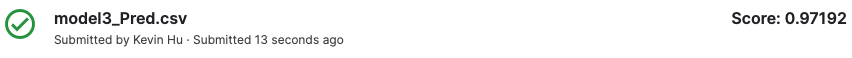

## Neural Network 4: 4 layers and 256 Nodes

In [32]:
start_time_4 = datetime.now()

# Model architecture for fourth model
model_4 = Sequential()
model_4.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(Dense(256, activation='relu')) 
model_4.add(Dense(256, activation='relu'))  
model_4.add(Dense(256, activation='relu'))  
model_4.add(Dense(10, activation='softmax'))  

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_4 = model_4.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time_4 = datetime.now()

training_time_4 = end_time_4 - start_time_4
print(f"Training Time: {training_time_4}")

train_accuracy_4 = history_4.history['accuracy'][-1]
val_accuracy_4 = history_4.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_4}")
print(f"Validation Accuracy: {val_accuracy_4}")


Epoch 1/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.2471 - accuracy: 0.9236 - val_loss: 0.1400 - val_accuracy: 0.9576
Epoch 2/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1131 - accuracy: 0.9661 - val_loss: 0.1355 - val_accuracy: 0.9598
Epoch 3/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.1342 - val_accuracy: 0.9595
Epoch 4/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.1075 - val_accuracy: 0.9693
Epoch 5/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0963 - val_accuracy: 0.9714
Epoch 6/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0445 - accuracy: 0.9874 - val_loss: 0.1413 - val_accuracy: 0.9626
Epoch 7/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.1133 - val_accuracy:

In [33]:
model_4_pred = model_4.predict(X_test)
predicted_labels_4 = np.argmax(model_4_pred, axis=1)
predicted_labels_4 = pd.Series(predicted_labels_4, name="Label")

submission_4 = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_4], axis=1)

submission_4.to_csv('model4_Pred.csv', index=False)

875/875 [==============================] - 1s 930us/step


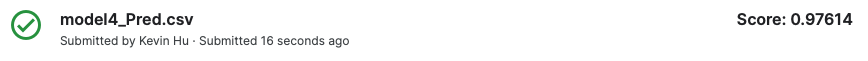

# Examining Results of the 2x2 benchmark experiment

In [37]:
# Results table
data = {
    "Layers": [2, 2, 4, 4],
    "Nodes per Layer": [128, 256, 128, 256],
    "Training Time (H:MM:SS:HH)": ["0:00:19.392189", "0:00:24.018875", "0:00:17.972243", "0:00:34.506709"],
    "Training Accuracy": [0.9944, 0.9958, 0.9916, 0.9918],
    "Validation Accuracy": [0.9686, 0.9717, 0.9717, 0.9755]
}
results_df = pd.DataFrame(data)
print(results_df)

   Layers  Nodes per Layer Training Time (H:MM:SS:HH)  Training Accuracy  \
0       2              128             0:00:19.392189             0.9944   
1       2              256             0:00:24.018875             0.9958   
2       4              128             0:00:17.972243             0.9916   
3       4              256             0:00:34.506709             0.9918   

   Validation Accuracy  
0               0.9686  
1               0.9717  
2               0.9717  
3               0.9755  


## Multi-class Confusion Matrix

In [38]:
y_val_pred_1 = np.argmax(model.predict(X_val), axis=1)
y_val_pred_2 = np.argmax(model_2.predict(X_val), axis=1)
y_val_pred_3 = np.argmax(model_3.predict(X_val), axis=1)
y_val_pred_4 = np.argmax(model_4.predict(X_val), axis=1)
 
y_val_true = np.argmax(keras_Y_val, axis=1)

132/132 [==============================] - 0s 886us/step


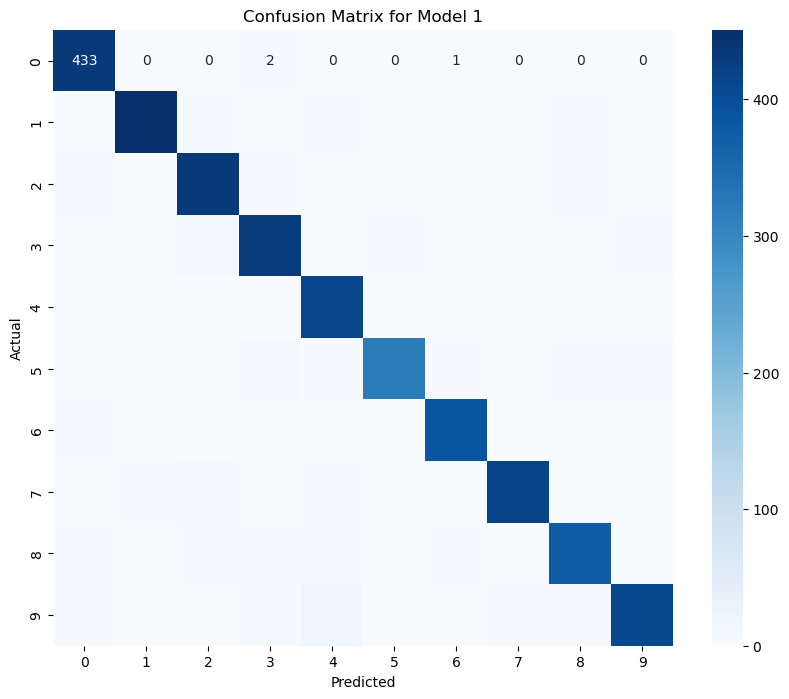

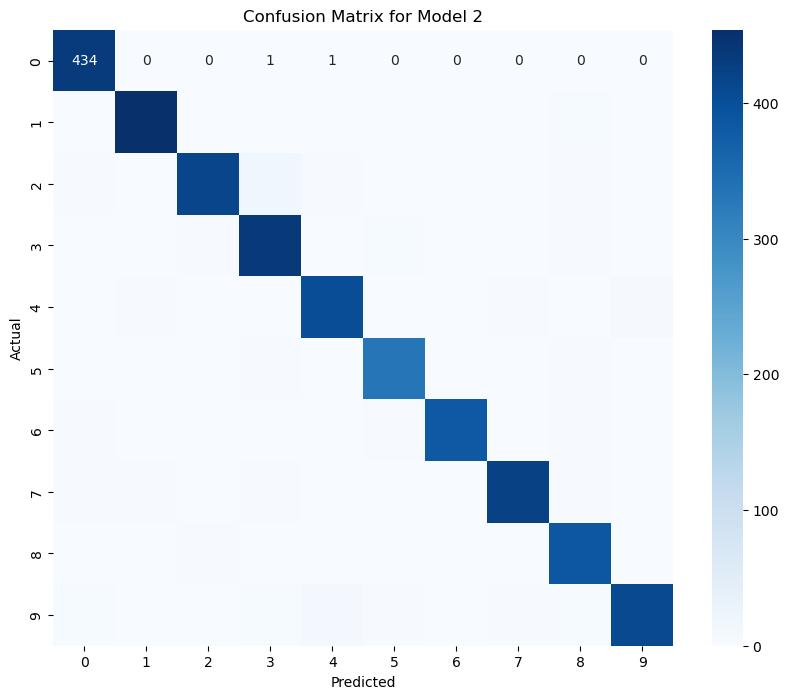

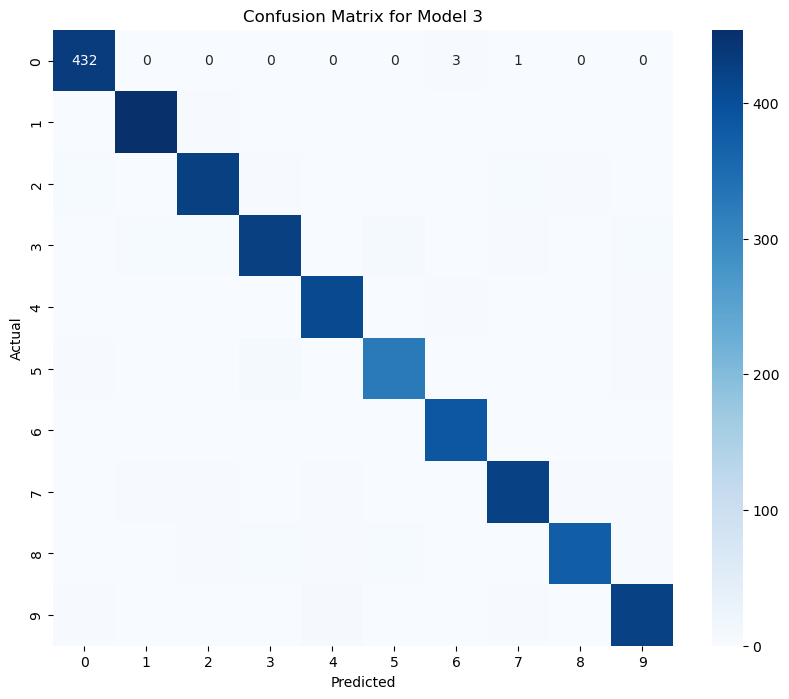

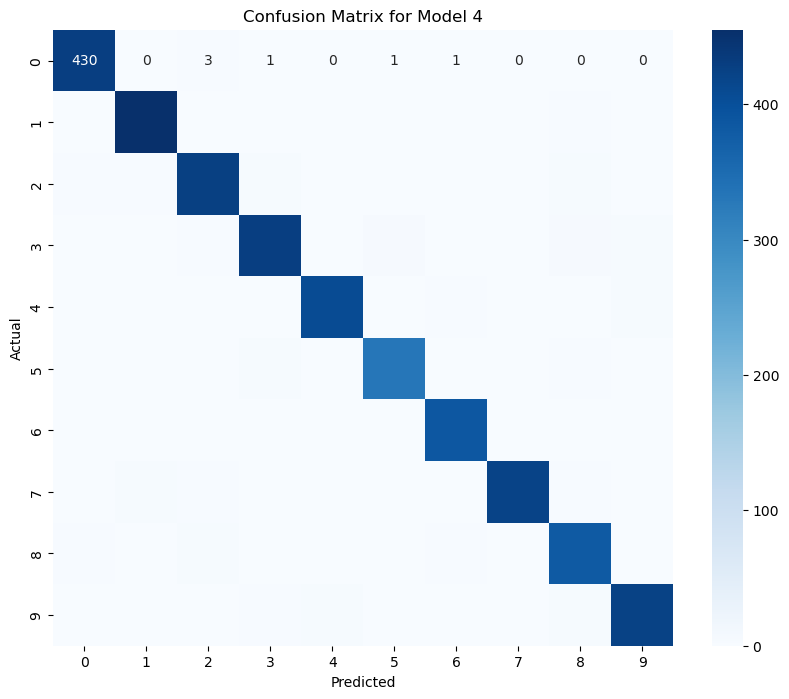

In [41]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrix 
plot_confusion_matrix(y_val_true, y_val_pred_1, 'Confusion Matrix for Model 1')
plot_confusion_matrix(y_val_true, y_val_pred_2, 'Confusion Matrix for Model 2')
plot_confusion_matrix(y_val_true, y_val_pred_3, 'Confusion Matrix for Model 3')
plot_confusion_matrix(y_val_true, y_val_pred_4, 'Confusion Matrix for Model 4')

# Further Neural Networks

### 4 Layers and 384 nodes

In [44]:
start_time_new = datetime.now()

# Model architecture
model_new = Sequential()
model_new.add(Dense(384, activation='relu', input_shape=(X_train.shape[1],)))  
model_new.add(Dense(384, activation='relu'))  
model_new.add(Dense(384, activation='relu'))  
model_new.add(Dense(384, activation='relu'))  
model_new.add(Dense(10, activation='softmax')) 

model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_new = model_new.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time_new = datetime.now()

training_time_new = end_time_new - start_time_new
print(f"Training Time: {training_time_new}")

train_accuracy_new = history_new.history['accuracy'][-1]
val_accuracy_new = history_new.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_new}")
print(f"Validation Accuracy: {val_accuracy_new}")

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.2571 - accuracy: 0.9223 - val_loss: 0.1386 - val_accuracy: 0.9567
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1168 - accuracy: 0.9668 - val_loss: 0.1374 - val_accuracy: 0.9598
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.1190 - val_accuracy: 0.9664
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.1109 - val_accuracy: 0.9688
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.1168 - val_accuracy: 0.9743
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.1090 - val_accuracy: 0.9745
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0431 - accuracy: 0.9875 - val_loss: 0.1008 - val_accuracy:

In [45]:
model_new_pred = model_new.predict(X_test)
predicted_labels_new = np.argmax(model_new_pred, axis=1)
predicted_labels_new = pd.Series(predicted_labels_new, name="Label")

submission_new = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_new], axis=1)

submission_new.to_csv('model384node.csv', index=False)

875/875 [==============================] - 1s 1ms/step


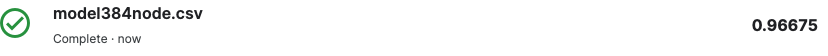

### 6 layers and 256 nodes

In [46]:
start_time_6_layer = datetime.now()

# Model architecture
model_6_layer = Sequential()
model_6_layer.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_6_layer.add(Dense(256, activation='relu')) 
model_6_layer.add(Dense(256, activation='relu')) 
model_6_layer.add(Dense(256, activation='relu')) 
model_6_layer.add(Dense(256, activation='relu')) 
model_6_layer.add(Dense(256, activation='relu'))  
model_6_layer.add(Dense(10, activation='softmax'))  

model_6_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_6_layer = model_6_layer.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time_6_layer = datetime.now()

training_time_6_layer = end_time_6_layer - start_time_6_layer
print(f"Training Time: {training_time_6_layer}")

train_accuracy_6_layer = history_6_layer.history['accuracy'][-1]
val_accuracy_6_layer = history_6_layer.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_6_layer}")
print(f"Validation Accuracy: {val_accuracy_6_layer}")

Epoch 1/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2915 - accuracy: 0.9125 - val_loss: 0.1436 - val_accuracy: 0.9576
Epoch 2/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.1370 - accuracy: 0.9608 - val_loss: 0.1594 - val_accuracy: 0.9550
Epoch 3/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.1284 - val_accuracy: 0.9607
Epoch 4/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0788 - accuracy: 0.9779 - val_loss: 0.1085 - val_accuracy: 0.9712
Epoch 5/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0684 - accuracy: 0.9805 - val_loss: 0.1161 - val_accuracy: 0.9717
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0586 - accuracy: 0.9838 - val_loss: 0.1269 - val_accuracy: 0.9676
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0499 - accuracy: 0.9862 - val_loss: 0.1253 - val_accuracy:

In [47]:
model_6_layer_pred = model_6_layer.predict(X_test)
predicted_labels_6_layer = np.argmax(model_6_layer_pred, axis=1)
predicted_labels_6_layer = pd.Series(predicted_labels_6_layer, name="Label")

submission_6_layer = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_6_layer], axis=1)

submission_6_layer.to_csv('model6layer_Pred.csv', index=False)

875/875 [==============================] - 1s 1ms/step


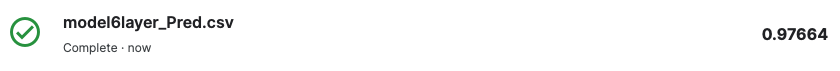

## 8 layers and 256 nodes

In [48]:
start_time_8_layer = datetime.now()

# Model architecture
model_8_layer = Sequential()
model_8_layer.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))  
model_8_layer.add(Dense(256, activation='relu'))  
model_8_layer.add(Dense(256, activation='relu'))  
model_8_layer.add(Dense(256, activation='relu'))  
model_8_layer.add(Dense(256, activation='relu')) 
model_8_layer.add(Dense(256, activation='relu'))  
model_8_layer.add(Dense(256, activation='relu')) 
model_8_layer.add(Dense(256, activation='relu'))  
model_8_layer.add(Dense(10, activation='softmax')) 

model_8_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_8_layer = model_8_layer.fit(X_train, keras_Y, epochs=10, validation_data=(X_val, keras_Y_val))

end_time_8_layer = datetime.now()

training_time_8_layer = end_time_8_layer - start_time_8_layer
print(f"Training Time: {training_time_8_layer}")

train_accuracy_8_layer = history_8_layer.history['accuracy'][-1]
val_accuracy_8_layer = history_8_layer.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy_8_layer}")
print(f"Validation Accuracy: {val_accuracy_8_layer}")

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.3282 - accuracy: 0.9009 - val_loss: 0.1662 - val_accuracy: 0.9524
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1531 - accuracy: 0.9589 - val_loss: 0.1373 - val_accuracy: 0.9645
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1219 - accuracy: 0.9685 - val_loss: 0.1615 - val_accuracy: 0.9536
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1020 - accuracy: 0.9743 - val_loss: 0.1218 - val_accuracy: 0.9717
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0826 - accuracy: 0.9785 - val_loss: 0.1315 - val_accuracy: 0.9688
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0759 - accuracy: 0.9808 - val_loss: 0.1315 - val_accuracy: 0.9667
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0652 - accuracy: 0.9836 - val_loss: 0.1064 - val_accuracy:

In [49]:
model_8_layer_pred = model_8_layer.predict(X_test)
predicted_labels_8_layer = np.argmax(model_8_layer_pred, axis=1)
predicted_labels_8_layer = pd.Series(predicted_labels_8_layer, name="Label")

submission_8_layer = pd.concat([pd.Series(range(1, 28001), name="ImageId"), predicted_labels_8_layer], axis=1)

submission_8_layer.to_csv('model8layer_Pred.csv', index=False)

875/875 [==============================] - 1s 1ms/step


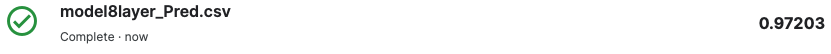